In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(1171, 100, 100)


In [17]:
print(y_test.shape)

(131, 100, 100)


In [18]:
print(x_train.shape)

(1171, 15, 1)


In [19]:
print(x_test.shape)

(131, 15, 1)


In [20]:
theta_train.shape

(1171,)

In [21]:
tsr_train.shape

(1171,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((1171, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((131, 2, 1))

In [28]:
tsr_theta_train.shape

(1171, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
30/30 [==============================] - 1s 6ms/step - loss: 0.0103 - rmse: 0.1005
Epoch 2/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0865
Epoch 3/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0841
Epoch 4/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 5/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 6/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 7/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 8/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 9/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 10/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0837
Epoch 11/10000
30/30 [=======

30/30 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 85/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0727
Epoch 86/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0720
Epoch 87/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 88/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0715
Epoch 89/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 90/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 91/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 92/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0704
Epoch 93/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 94/10000
30/30 [=============

30/30 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 168/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 169/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 170/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 171/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 172/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0583
Epoch 173/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0583
Epoch 174/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 175/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0581
Epoch 176/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0581
Epoch 177/10000
30/30 [===

30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 250/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 251/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 252/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 253/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 254/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 255/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 256/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 257/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0508
Epoch 258/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0508
Epoch 259/10000
30/30 [===

30/30 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 332/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 333/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 334/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 335/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 336/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 337/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 338/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 339/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 340/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 341/10000
30/30 [===

30/30 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 414/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 415/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 416/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 417/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 418/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 419/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 420/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 421/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 422/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 423/10000
30/30 [===

30/30 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 496/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 497/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 498/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 499/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 500/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 501/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 502/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 503/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 504/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 505/10000
30/30 [===

30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 578/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 579/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 580/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 581/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 582/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 583/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 584/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 585/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 586/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 587/10000
30/30 [===

30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 660/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 661/10000
30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 662/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0303
Epoch 663/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0300
Epoch 664/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0300
Epoch 665/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.9975e-04 - rmse: 0.0296
Epoch 666/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 667/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 668/10000
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 669/10000
30/30 

30/30 [==============================] - 0s 5ms/step - loss: 8.8079e-04 - rmse: 0.0275
Epoch 740/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7805e-04 - rmse: 0.0275
Epoch 741/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.6979e-04 - rmse: 0.0273
Epoch 742/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7218e-04 - rmse: 0.0274
Epoch 743/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.9178e-04 - rmse: 0.0277
Epoch 744/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.8222e-04 - rmse: 0.0275
Epoch 745/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.8005e-04 - rmse: 0.0275
Epoch 746/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.9153e-04 - rmse: 0.0277
Epoch 747/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.7036e-04 - rmse: 0.0273
Epoch 748/10000
30/30 [==============================] - 0s 5ms/step - loss: 8.5595e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 7.7351e-04 - rmse: 0.0255
Epoch 819/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.7359e-04 - rmse: 0.0255
Epoch 820/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6658e-04 - rmse: 0.0253
Epoch 821/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.6024e-04 - rmse: 0.0252
Epoch 822/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5458e-04 - rmse: 0.0251
Epoch 823/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5595e-04 - rmse: 0.0251
Epoch 824/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5269e-04 - rmse: 0.0250
Epoch 825/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5502e-04 - rmse: 0.0251
Epoch 826/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.5572e-04 - rmse: 0.0251
Epoch 827/10000
30/30 [==============================] - 0s 5ms/step - loss: 7.7933e-04 -

30/30 [==============================] - 0s 6ms/step - loss: 6.8138e-04 - rmse: 0.0236
Epoch 898/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7303e-04 - rmse: 0.0234
Epoch 899/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6877e-04 - rmse: 0.0233
Epoch 900/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.9383e-04 - rmse: 0.0238
Epoch 901/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7386e-04 - rmse: 0.0234
Epoch 902/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.6224e-04 - rmse: 0.0232
Epoch 903/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.8567e-04 - rmse: 0.0237
Epoch 904/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.7205e-04 - rmse: 0.0234
Epoch 905/10000
30/30 [==============================] - 0s 6ms/step - loss: 6.6671e-04 - rmse: 0.0232
Epoch 906/10000
30/30 [==============================] - 0s 6ms/step - loss: 6.5886e-04 -

30/30 [==============================] - 0s 6ms/step - loss: 5.9871e-04 - rmse: 0.0217
Epoch 977/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0703e-04 - rmse: 0.0219
Epoch 978/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.9508e-04 - rmse: 0.0216
Epoch 979/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0375e-04 - rmse: 0.0218
Epoch 980/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0063e-04 - rmse: 0.0218
Epoch 981/10000
30/30 [==============================] - 0s 5ms/step - loss: 6.0525e-04 - rmse: 0.0219
Epoch 982/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.9809e-04 - rmse: 0.0217
Epoch 983/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8592e-04 - rmse: 0.0214
Epoch 984/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.8571e-04 - rmse: 0.0214
Epoch 985/10000
30/30 [==============================] - 0s 6ms/step - loss: 6.0149e-04 -

30/30 [==============================] - 0s 5ms/step - loss: 5.4600e-04 - rmse: 0.0205
Epoch 1056/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.3903e-04 - rmse: 0.0203
Epoch 1057/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.3876e-04 - rmse: 0.0203
Epoch 1058/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.6785e-04 - rmse: 0.0210
Epoch 1059/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.6012e-04 - rmse: 0.0208
Epoch 1060/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.5129e-04 - rmse: 0.0206
Epoch 1061/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5915e-04 - rmse: 0.0208
Epoch 1062/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.3294e-04 - rmse: 0.0202
Epoch 1063/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.5728e-04 - rmse: 0.0207
Epoch 1064/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.3

30/30 [==============================] - 0s 6ms/step - loss: 5.0056e-04 - rmse: 0.0193
Epoch 1134/10000
30/30 [==============================] - 0s 5ms/step - loss: 5.0339e-04 - rmse: 0.0194
Epoch 1135/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.9133e-04 - rmse: 0.0191
Epoch 1136/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.9608e-04 - rmse: 0.0192
Epoch 1137/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.9708e-04 - rmse: 0.0192
Epoch 1138/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.1330e-04 - rmse: 0.0197
Epoch 1139/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.1296e-04 - rmse: 0.0197
Epoch 1140/10000
30/30 [==============================] - 0s 6ms/step - loss: 5.0213e-04 - rmse: 0.0194
Epoch 1141/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.8990e-04 - rmse: 0.0191
Epoch 1142/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.8

30/30 [==============================] - 0s 5ms/step - loss: 4.6170e-04 - rmse: 0.0183
Epoch 1212/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7166e-04 - rmse: 0.0186
Epoch 1213/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.5665e-04 - rmse: 0.0182
Epoch 1214/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.4753e-04 - rmse: 0.0179
Epoch 1215/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5745e-04 - rmse: 0.0182
Epoch 1216/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.4503e-04 - rmse: 0.0179
Epoch 1217/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.6480e-04 - rmse: 0.0184
Epoch 1218/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.5543e-04 - rmse: 0.0181
Epoch 1219/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.7252e-04 - rmse: 0.0186
Epoch 1220/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.8

30/30 [==============================] - 0s 6ms/step - loss: 4.2810e-04 - rmse: 0.0174
Epoch 1290/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.1352e-04 - rmse: 0.0170
Epoch 1291/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.1330e-04 - rmse: 0.0170
Epoch 1292/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.1481e-04 - rmse: 0.0170
Epoch 1293/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.2425e-04 - rmse: 0.0173
Epoch 1294/10000
30/30 [==============================] - 0s 6ms/step - loss: 4.2571e-04 - rmse: 0.0173
Epoch 1295/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.1587e-04 - rmse: 0.0170
Epoch 1296/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2870e-04 - rmse: 0.0174
Epoch 1297/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2564e-04 - rmse: 0.0173
Epoch 1298/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.2

30/30 [==============================] - 0s 5ms/step - loss: 4.0442e-04 - rmse: 0.0167
Epoch 1368/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0735e-04 - rmse: 0.0168
Epoch 1369/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0272e-04 - rmse: 0.0167
Epoch 1370/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9087e-04 - rmse: 0.0163
Epoch 1371/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8971e-04 - rmse: 0.0163
Epoch 1372/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.8579e-04 - rmse: 0.0162
Epoch 1373/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9405e-04 - rmse: 0.0164
Epoch 1374/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0518e-04 - rmse: 0.0167
Epoch 1375/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.9924e-04 - rmse: 0.0166
Epoch 1376/10000
30/30 [==============================] - 0s 5ms/step - loss: 4.0

30/30 [==============================] - 0s 6ms/step - loss: 3.6866e-04 - rmse: 0.0156
Epoch 1446/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5986e-04 - rmse: 0.0154
Epoch 1447/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.6199e-04 - rmse: 0.0154
Epoch 1448/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.6947e-04 - rmse: 0.0157
Epoch 1449/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6527e-04 - rmse: 0.0155
Epoch 1450/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6767e-04 - rmse: 0.0156
Epoch 1451/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7236e-04 - rmse: 0.0158
Epoch 1452/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7628e-04 - rmse: 0.0159
Epoch 1453/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7406e-04 - rmse: 0.0158
Epoch 1454/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.7

30/30 [==============================] - 0s 5ms/step - loss: 3.5846e-04 - rmse: 0.0153
Epoch 1524/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6891e-04 - rmse: 0.0157
Epoch 1525/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.5341e-04 - rmse: 0.0152
Epoch 1526/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.6686e-04 - rmse: 0.0156
Epoch 1527/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.6094e-04 - rmse: 0.0154
Epoch 1528/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.5960e-04 - rmse: 0.0154
Epoch 1529/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.5028e-04 - rmse: 0.0151
Epoch 1530/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.5960e-04 - rmse: 0.0154
Epoch 1531/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.7744e-04 - rmse: 0.0159
Epoch 1532/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4

30/30 [==============================] - 0s 6ms/step - loss: 4.2525e-04 - rmse: 0.0174
Epoch 1602/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.7024e-04 - rmse: 0.0157
Epoch 1603/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.6048e-04 - rmse: 0.0154
Epoch 1604/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.4200e-04 - rmse: 0.0148
Epoch 1605/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.3251e-04 - rmse: 0.0145
Epoch 1606/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.2954e-04 - rmse: 0.0144
Epoch 1607/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2544e-04 - rmse: 0.0143
Epoch 1608/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.3019e-04 - rmse: 0.0144
Epoch 1609/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.3901e-04 - rmse: 0.0147
Epoch 1610/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3

30/30 [==============================] - 0s 6ms/step - loss: 3.3787e-04 - rmse: 0.0147
Epoch 1680/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.2777e-04 - rmse: 0.0144
Epoch 1681/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.1779e-04 - rmse: 0.0140
Epoch 1682/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2139e-04 - rmse: 0.0142
Epoch 1683/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.2576e-04 - rmse: 0.0143
Epoch 1684/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.2622e-04 - rmse: 0.0143
Epoch 1685/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.2741e-04 - rmse: 0.0144
Epoch 1686/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.2140e-04 - rmse: 0.0142
Epoch 1687/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.1990e-04 - rmse: 0.0141
Epoch 1688/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.3

30/30 [==============================] - 0s 6ms/step - loss: 3.0114e-04 - rmse: 0.0135
Epoch 1758/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.0279e-04 - rmse: 0.0135
Epoch 1759/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1626e-04 - rmse: 0.0140
Epoch 1760/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.0423e-04 - rmse: 0.0136
Epoch 1761/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1381e-04 - rmse: 0.0139
Epoch 1762/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.1574e-04 - rmse: 0.0140
Epoch 1763/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.9923e-04 - rmse: 0.0134
Epoch 1764/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.0463e-04 - rmse: 0.0136
Epoch 1765/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.1418e-04 - rmse: 0.0139
Epoch 1766/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.0

30/30 [==============================] - 0s 6ms/step - loss: 2.8947e-04 - rmse: 0.0131
Epoch 1836/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.9286e-04 - rmse: 0.0132
Epoch 1837/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.9478e-04 - rmse: 0.0133
Epoch 1838/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9208e-04 - rmse: 0.0132
Epoch 1839/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.0475e-04 - rmse: 0.0136
Epoch 1840/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.0981e-04 - rmse: 0.0138
Epoch 1841/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.1695e-04 - rmse: 0.0141
Epoch 1842/10000
30/30 [==============================] - 0s 6ms/step - loss: 3.0308e-04 - rmse: 0.0136
Epoch 1843/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.9882e-04 - rmse: 0.0134
Epoch 1844/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.9

30/30 [==============================] - 0s 5ms/step - loss: 2.8712e-04 - rmse: 0.0130
Epoch 1914/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.8557e-04 - rmse: 0.0130
Epoch 1915/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8405e-04 - rmse: 0.0129
Epoch 1916/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9257e-04 - rmse: 0.0132
Epoch 1917/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.8438e-04 - rmse: 0.0129
Epoch 1918/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8481e-04 - rmse: 0.0129
Epoch 1919/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.9136e-04 - rmse: 0.0132
Epoch 1920/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.8207e-04 - rmse: 0.0128
Epoch 1921/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8645e-04 - rmse: 0.0130
Epoch 1922/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8

30/30 [==============================] - 0s 6ms/step - loss: 2.8171e-04 - rmse: 0.0128
Epoch 1992/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8294e-04 - rmse: 0.0129
Epoch 1993/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.7987e-04 - rmse: 0.0128
Epoch 1994/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.7041e-04 - rmse: 0.0124
Epoch 1995/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.8682e-04 - rmse: 0.0130
Epoch 1996/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.7453e-04 - rmse: 0.0126
Epoch 1997/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.8061e-04 - rmse: 0.0128
Epoch 1998/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6910e-04 - rmse: 0.0123
Epoch 1999/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7329e-04 - rmse: 0.0125
Epoch 2000/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7

30/30 [==============================] - 0s 6ms/step - loss: 2.6518e-04 - rmse: 0.0122
Epoch 2070/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6710e-04 - rmse: 0.0123
Epoch 2071/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.6938e-04 - rmse: 0.0124
Epoch 2072/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6996e-04 - rmse: 0.0124
Epoch 2073/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.9785e-04 - rmse: 0.0135
Epoch 2074/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7980e-04 - rmse: 0.0128
Epoch 2075/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7199e-04 - rmse: 0.0125
Epoch 2076/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.8142e-04 - rmse: 0.0129
Epoch 2077/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8177e-04 - rmse: 0.0129
Epoch 2078/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8

30/30 [==============================] - 0s 6ms/step - loss: 2.6970e-04 - rmse: 0.0125
Epoch 2148/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6229e-04 - rmse: 0.0122
Epoch 2149/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.6884e-04 - rmse: 0.0124
Epoch 2150/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8106e-04 - rmse: 0.0129
Epoch 2151/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.7400e-04 - rmse: 0.0126
Epoch 2152/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5759e-04 - rmse: 0.0120
Epoch 2153/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6249e-04 - rmse: 0.0122
Epoch 2154/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.6610e-04 - rmse: 0.0123
Epoch 2155/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.6427e-04 - rmse: 0.0122
Epoch 2156/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.5

30/30 [==============================] - 0s 5ms/step - loss: 2.5400e-04 - rmse: 0.0119
Epoch 2226/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5094e-04 - rmse: 0.0117
Epoch 2227/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6756e-04 - rmse: 0.0124
Epoch 2228/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.8066e-04 - rmse: 0.0129
Epoch 2229/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.7013e-04 - rmse: 0.0125
Epoch 2230/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6400e-04 - rmse: 0.0123
Epoch 2231/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5938e-04 - rmse: 0.0121
Epoch 2232/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5901e-04 - rmse: 0.0121
Epoch 2233/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5218e-04 - rmse: 0.0118
Epoch 2234/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5

30/30 [==============================] - 0s 5ms/step - loss: 2.4659e-04 - rmse: 0.0116
Epoch 2304/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4588e-04 - rmse: 0.0116
Epoch 2305/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5584e-04 - rmse: 0.0120
Epoch 2306/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5656e-04 - rmse: 0.0120
Epoch 2307/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5339e-04 - rmse: 0.0119
Epoch 2308/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4556e-04 - rmse: 0.0116
Epoch 2309/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4729e-04 - rmse: 0.0116
Epoch 2310/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5079e-04 - rmse: 0.0118
Epoch 2311/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4594e-04 - rmse: 0.0116
Epoch 2312/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5

30/30 [==============================] - 0s 5ms/step - loss: 2.5081e-04 - rmse: 0.0118
Epoch 2382/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5390e-04 - rmse: 0.0120
Epoch 2383/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4858e-04 - rmse: 0.0117
Epoch 2384/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4887e-04 - rmse: 0.0117
Epoch 2385/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4840e-04 - rmse: 0.0117
Epoch 2386/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4217e-04 - rmse: 0.0115
Epoch 2387/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.4312e-04 - rmse: 0.0115
Epoch 2388/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.3797e-04 - rmse: 0.0113
Epoch 2389/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.4598e-04 - rmse: 0.0116
Epoch 2390/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4

30/30 [==============================] - 0s 5ms/step - loss: 2.4919e-04 - rmse: 0.0118
Epoch 2460/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3522e-04 - rmse: 0.0112
Epoch 2461/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4039e-04 - rmse: 0.0114
Epoch 2462/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4400e-04 - rmse: 0.0116
Epoch 2463/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4505e-04 - rmse: 0.0116
Epoch 2464/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4471e-04 - rmse: 0.0116
Epoch 2465/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3934e-04 - rmse: 0.0114
Epoch 2466/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.3330e-04 - rmse: 0.0150
Epoch 2467/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6396e-04 - rmse: 0.0124
Epoch 2468/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.6

30/30 [==============================] - 0s 5ms/step - loss: 2.3956e-04 - rmse: 0.0114
Epoch 2538/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3738e-04 - rmse: 0.0113
Epoch 2539/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3265e-04 - rmse: 0.0111
Epoch 2540/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3162e-04 - rmse: 0.0111
Epoch 2541/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3579e-04 - rmse: 0.0113
Epoch 2542/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4577e-04 - rmse: 0.0117
Epoch 2543/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3466e-04 - rmse: 0.0112
Epoch 2544/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3677e-04 - rmse: 0.0113
Epoch 2545/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3870e-04 - rmse: 0.0114
Epoch 2546/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5

30/30 [==============================] - 0s 5ms/step - loss: 2.3979e-04 - rmse: 0.0115
Epoch 2616/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3731e-04 - rmse: 0.0114
Epoch 2617/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3418e-04 - rmse: 0.0112
Epoch 2618/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3760e-04 - rmse: 0.0114
Epoch 2619/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5811e-04 - rmse: 0.0123
Epoch 2620/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3712e-04 - rmse: 0.0114
Epoch 2621/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3269e-04 - rmse: 0.0112
Epoch 2622/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3351e-04 - rmse: 0.0112
Epoch 2623/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2811e-04 - rmse: 0.0110
Epoch 2624/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3

30/30 [==============================] - 0s 5ms/step - loss: 2.4035e-04 - rmse: 0.0116
Epoch 2694/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3314e-04 - rmse: 0.0112
Epoch 2695/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.3426e-04 - rmse: 0.0113
Epoch 2696/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.3214e-04 - rmse: 0.0112
Epoch 2697/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2429e-04 - rmse: 0.0108
Epoch 2698/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.2675e-04 - rmse: 0.0110
Epoch 2699/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2247e-04 - rmse: 0.0108
Epoch 2700/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2627e-04 - rmse: 0.0109
Epoch 2701/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2886e-04 - rmse: 0.0111
Epoch 2702/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3

30/30 [==============================] - 0s 5ms/step - loss: 2.2809e-04 - rmse: 0.0111
Epoch 2772/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1602e-04 - rmse: 0.0105
Epoch 2773/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1870e-04 - rmse: 0.0106
Epoch 2774/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1791e-04 - rmse: 0.0106
Epoch 2775/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3175e-04 - rmse: 0.0112
Epoch 2776/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3786e-04 - rmse: 0.0115
Epoch 2777/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2963e-04 - rmse: 0.0111
Epoch 2778/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2204e-04 - rmse: 0.0108
Epoch 2779/10000
30/30 [==============================] - 0s 5ms/step - loss: 3.1030e-04 - rmse: 0.0143
Epoch 2780/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3

30/30 [==============================] - 0s 5ms/step - loss: 2.3095e-04 - rmse: 0.0112
Epoch 2850/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2452e-04 - rmse: 0.0110
Epoch 2851/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3213e-04 - rmse: 0.0113
Epoch 2852/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2261e-04 - rmse: 0.0109
Epoch 2853/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2293e-04 - rmse: 0.0109
Epoch 2854/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3969e-04 - rmse: 0.0116
Epoch 2855/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2018e-04 - rmse: 0.0108
Epoch 2856/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1698e-04 - rmse: 0.0106
Epoch 2857/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1461e-04 - rmse: 0.0105
Epoch 2858/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1

30/30 [==============================] - 0s 5ms/step - loss: 2.2187e-04 - rmse: 0.0109
Epoch 2928/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2576e-04 - rmse: 0.0111
Epoch 2929/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2445e-04 - rmse: 0.0110
Epoch 2930/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1314e-04 - rmse: 0.0105
Epoch 2931/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2341e-04 - rmse: 0.0109
Epoch 2932/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2393e-04 - rmse: 0.0110
Epoch 2933/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2717e-04 - rmse: 0.0111
Epoch 2934/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2287e-04 - rmse: 0.0109
Epoch 2935/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2033e-04 - rmse: 0.0108
Epoch 2936/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3

30/30 [==============================] - 0s 5ms/step - loss: 2.1379e-04 - rmse: 0.0105
Epoch 3006/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1700e-04 - rmse: 0.0107
Epoch 3007/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1323e-04 - rmse: 0.0105
Epoch 3008/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0897e-04 - rmse: 0.0103
Epoch 3009/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1001e-04 - rmse: 0.0104
Epoch 3010/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1187e-04 - rmse: 0.0105
Epoch 3011/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1536e-04 - rmse: 0.0106
Epoch 3012/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1628e-04 - rmse: 0.0107
Epoch 3013/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3170e-04 - rmse: 0.0114
Epoch 3014/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2

30/30 [==============================] - 0s 5ms/step - loss: 2.0699e-04 - rmse: 0.0103
Epoch 3084/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1650e-04 - rmse: 0.0107
Epoch 3085/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0954e-04 - rmse: 0.0104
Epoch 3086/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0244e-04 - rmse: 0.0100
Epoch 3087/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0666e-04 - rmse: 0.0102
Epoch 3088/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1072e-04 - rmse: 0.0104
Epoch 3089/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1268e-04 - rmse: 0.0105
Epoch 3090/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.5155e-04 - rmse: 0.0122
Epoch 3091/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.1621e-04 - rmse: 0.0107
Epoch 3092/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.3

30/30 [==============================] - 0s 5ms/step - loss: 2.2536e-04 - rmse: 0.0112
Epoch 3162/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1292e-04 - rmse: 0.0106
Epoch 3163/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0299e-04 - rmse: 0.0101
Epoch 3164/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0286e-04 - rmse: 0.0101
Epoch 3165/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0682e-04 - rmse: 0.0103
Epoch 3166/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0650e-04 - rmse: 0.0103
Epoch 3167/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0713e-04 - rmse: 0.0103
Epoch 3168/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0911e-04 - rmse: 0.0104
Epoch 3169/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1240e-04 - rmse: 0.0106
Epoch 3170/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.2

30/30 [==============================] - 0s 6ms/step - loss: 2.1456e-04 - rmse: 0.0107
Epoch 3240/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.1326e-04 - rmse: 0.0107
Epoch 3241/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1629e-04 - rmse: 0.0108
Epoch 3242/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0979e-04 - rmse: 0.0105
Epoch 3243/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0539e-04 - rmse: 0.0103
Epoch 3244/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0465e-04 - rmse: 0.0102
Epoch 3245/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0425e-04 - rmse: 0.0102
Epoch 3246/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.2323e-04 - rmse: 0.0111
Epoch 3247/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0594e-04 - rmse: 0.0103
Epoch 3248/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9

30/30 [==============================] - 0s 6ms/step - loss: 2.0650e-04 - rmse: 0.0104
Epoch 3318/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0722e-04 - rmse: 0.0104
Epoch 3319/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0062e-04 - rmse: 0.0101
Epoch 3320/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9763e-04 - rmse: 0.0099
Epoch 3321/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0705e-04 - rmse: 0.0104
Epoch 3322/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1313e-04 - rmse: 0.0107
Epoch 3323/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0453e-04 - rmse: 0.0103
Epoch 3324/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0081e-04 - rmse: 0.0101
Epoch 3325/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9877e-04 - rmse: 0.0100
Epoch 3326/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9

30/30 [==============================] - 0s 6ms/step - loss: 2.0071e-04 - rmse: 0.0101
Epoch 3396/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0862e-04 - rmse: 0.0105
Epoch 3397/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.1071e-04 - rmse: 0.0106
Epoch 3398/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9324e-04 - rmse: 0.0098
Epoch 3399/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9113e-04 - rmse: 0.0097
Epoch 3400/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9722e-04 - rmse: 0.0100
Epoch 3401/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9735e-04 - rmse: 0.0100
Epoch 3402/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9775e-04 - rmse: 0.0100
Epoch 3403/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0280e-04 - rmse: 0.0102
Epoch 3404/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9

30/30 [==============================] - 0s 5ms/step - loss: 2.0154e-04 - rmse: 0.0102
Epoch 3474/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0079e-04 - rmse: 0.0102
Epoch 3475/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9529e-04 - rmse: 0.0099
Epoch 3476/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8968e-04 - rmse: 0.0096
Epoch 3477/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9480e-04 - rmse: 0.0099
Epoch 3478/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9427e-04 - rmse: 0.0099
Epoch 3479/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9200e-04 - rmse: 0.0097
Epoch 3480/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9291e-04 - rmse: 0.0098
Epoch 3481/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9326e-04 - rmse: 0.0098
Epoch 3482/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9

30/30 [==============================] - 0s 5ms/step - loss: 1.9036e-04 - rmse: 0.0097
Epoch 3552/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9931e-04 - rmse: 0.0102
Epoch 3553/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9127e-04 - rmse: 0.0097
Epoch 3554/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9486e-04 - rmse: 0.0099
Epoch 3555/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.1118e-04 - rmse: 0.0107
Epoch 3556/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9243e-04 - rmse: 0.0098
Epoch 3557/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9450e-04 - rmse: 0.0099
Epoch 3558/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0504e-04 - rmse: 0.0104
Epoch 3559/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9560e-04 - rmse: 0.0100
Epoch 3560/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9

30/30 [==============================] - 0s 5ms/step - loss: 1.8782e-04 - rmse: 0.0096
Epoch 3630/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7940e-04 - rmse: 0.0092
Epoch 3631/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8145e-04 - rmse: 0.0093
Epoch 3632/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8664e-04 - rmse: 0.0096
Epoch 3633/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8785e-04 - rmse: 0.0096
Epoch 3634/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8295e-04 - rmse: 0.0094
Epoch 3635/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8900e-04 - rmse: 0.0097
Epoch 3636/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8454e-04 - rmse: 0.0094
Epoch 3637/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8487e-04 - rmse: 0.0095
Epoch 3638/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8

30/30 [==============================] - 0s 6ms/step - loss: 1.9437e-04 - rmse: 0.0100
Epoch 3708/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9727e-04 - rmse: 0.0101
Epoch 3709/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0087e-04 - rmse: 0.0103
Epoch 3710/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9756e-04 - rmse: 0.0101
Epoch 3711/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9365e-04 - rmse: 0.0100
Epoch 3712/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8380e-04 - rmse: 0.0094
Epoch 3713/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8543e-04 - rmse: 0.0095
Epoch 3714/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8782e-04 - rmse: 0.0097
Epoch 3715/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8716e-04 - rmse: 0.0096
Epoch 3716/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8

30/30 [==============================] - 0s 5ms/step - loss: 1.7803e-04 - rmse: 0.0092
Epoch 3786/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8166e-04 - rmse: 0.0094
Epoch 3787/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8178e-04 - rmse: 0.0094
Epoch 3788/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7921e-04 - rmse: 0.0092
Epoch 3789/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9072e-04 - rmse: 0.0098
Epoch 3790/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8162e-04 - rmse: 0.0094
Epoch 3791/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8022e-04 - rmse: 0.0093
Epoch 3792/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8912e-04 - rmse: 0.0098
Epoch 3793/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0445e-04 - rmse: 0.0105
Epoch 3794/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8

30/30 [==============================] - 0s 6ms/step - loss: 1.9068e-04 - rmse: 0.0099
Epoch 3864/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0087e-04 - rmse: 0.0104
Epoch 3865/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8508e-04 - rmse: 0.0096
Epoch 3866/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8326e-04 - rmse: 0.0095
Epoch 3867/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7957e-04 - rmse: 0.0093
Epoch 3868/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7904e-04 - rmse: 0.0093
Epoch 3869/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8549e-04 - rmse: 0.0096
Epoch 3870/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8858e-04 - rmse: 0.0098
Epoch 3871/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8719e-04 - rmse: 0.0097
Epoch 3872/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8

30/30 [==============================] - 0s 5ms/step - loss: 1.7881e-04 - rmse: 0.0093
Epoch 3942/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8072e-04 - rmse: 0.0094
Epoch 3943/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9103e-04 - rmse: 0.0099
Epoch 3944/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9406e-04 - rmse: 0.0101
Epoch 3945/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8655e-04 - rmse: 0.0097
Epoch 3946/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0462e-04 - rmse: 0.0106
Epoch 3947/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.0047e-04 - rmse: 0.0104
Epoch 3948/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8870e-04 - rmse: 0.0098
Epoch 3949/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.0135e-04 - rmse: 0.0104
Epoch 3950/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8

30/30 [==============================] - 0s 5ms/step - loss: 1.7194e-04 - rmse: 0.0090
Epoch 4020/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8169e-04 - rmse: 0.0095
Epoch 4021/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8511e-04 - rmse: 0.0097
Epoch 4022/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8307e-04 - rmse: 0.0096
Epoch 4023/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9074e-04 - rmse: 0.0100
Epoch 4024/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9288e-04 - rmse: 0.0101
Epoch 4025/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8442e-04 - rmse: 0.0096
Epoch 4026/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8275e-04 - rmse: 0.0096
Epoch 4027/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7200e-04 - rmse: 0.0090
Epoch 4028/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.4

30/30 [==============================] - 0s 6ms/step - loss: 1.8097e-04 - rmse: 0.0095
Epoch 4098/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7206e-04 - rmse: 0.0090
Epoch 4099/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7675e-04 - rmse: 0.0093
Epoch 4100/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7944e-04 - rmse: 0.0094
Epoch 4101/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8340e-04 - rmse: 0.0096
Epoch 4102/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8381e-04 - rmse: 0.0096
Epoch 4103/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7728e-04 - rmse: 0.0093
Epoch 4104/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7375e-04 - rmse: 0.0091
Epoch 4105/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7943e-04 - rmse: 0.0094
Epoch 4106/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9

30/30 [==============================] - 0s 6ms/step - loss: 1.8512e-04 - rmse: 0.0098
Epoch 4176/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7918e-04 - rmse: 0.0094
Epoch 4177/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8266e-04 - rmse: 0.0096
Epoch 4178/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7840e-04 - rmse: 0.0094
Epoch 4179/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8580e-04 - rmse: 0.0098
Epoch 4180/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8128e-04 - rmse: 0.0096
Epoch 4181/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7793e-04 - rmse: 0.0094
Epoch 4182/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7836e-04 - rmse: 0.0094
Epoch 4183/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7385e-04 - rmse: 0.0092
Epoch 4184/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7

30/30 [==============================] - 0s 5ms/step - loss: 1.7678e-04 - rmse: 0.0094
Epoch 4254/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6745e-04 - rmse: 0.0088
Epoch 4255/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7304e-04 - rmse: 0.0092
Epoch 4256/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7737e-04 - rmse: 0.0094
Epoch 4257/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7676e-04 - rmse: 0.0094
Epoch 4258/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6716e-04 - rmse: 0.0088
Epoch 4259/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7208e-04 - rmse: 0.0091
Epoch 4260/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6908e-04 - rmse: 0.0089
Epoch 4261/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7105e-04 - rmse: 0.0090
Epoch 4262/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7

30/30 [==============================] - 0s 6ms/step - loss: 2.0324e-04 - rmse: 0.0107
Epoch 4332/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8167e-04 - rmse: 0.0096
Epoch 4333/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7266e-04 - rmse: 0.0092
Epoch 4334/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6836e-04 - rmse: 0.0089
Epoch 4335/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7261e-04 - rmse: 0.0092
Epoch 4336/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7170e-04 - rmse: 0.0091
Epoch 4337/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6639e-04 - rmse: 0.0088
Epoch 4338/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.2021e-04 - rmse: 0.0115
Epoch 4339/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8752e-04 - rmse: 0.0099
Epoch 4340/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7

30/30 [==============================] - 0s 5ms/step - loss: 1.6667e-04 - rmse: 0.0089
Epoch 4410/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6324e-04 - rmse: 0.0087
Epoch 4411/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6829e-04 - rmse: 0.0090
Epoch 4412/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6693e-04 - rmse: 0.0089
Epoch 4413/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7184e-04 - rmse: 0.0092
Epoch 4414/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6854e-04 - rmse: 0.0090
Epoch 4415/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7786e-04 - rmse: 0.0095
Epoch 4416/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7154e-04 - rmse: 0.0091
Epoch 4417/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6156e-04 - rmse: 0.0086
Epoch 4418/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6

30/30 [==============================] - 0s 6ms/step - loss: 1.6289e-04 - rmse: 0.0087
Epoch 4488/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6894e-04 - rmse: 0.0090
Epoch 4489/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6135e-04 - rmse: 0.0086
Epoch 4490/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7467e-04 - rmse: 0.0094
Epoch 4491/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7560e-04 - rmse: 0.0094
Epoch 4492/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6903e-04 - rmse: 0.0090
Epoch 4493/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6642e-04 - rmse: 0.0089
Epoch 4494/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7196e-04 - rmse: 0.0092
Epoch 4495/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6303e-04 - rmse: 0.0087
Epoch 4496/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7

30/30 [==============================] - 0s 6ms/step - loss: 1.5818e-04 - rmse: 0.0085
Epoch 4566/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5701e-04 - rmse: 0.0084
Epoch 4567/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7277e-04 - rmse: 0.0093
Epoch 4568/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6444e-04 - rmse: 0.0088
Epoch 4569/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6827e-04 - rmse: 0.0090
Epoch 4570/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6584e-04 - rmse: 0.0089
Epoch 4571/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7036e-04 - rmse: 0.0092
Epoch 4572/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7168e-04 - rmse: 0.0092
Epoch 4573/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.4590e-04 - rmse: 0.0126
Epoch 4574/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.9

30/30 [==============================] - 0s 6ms/step - loss: 1.6224e-04 - rmse: 0.0087
Epoch 4644/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6765e-04 - rmse: 0.0090
Epoch 4645/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5984e-04 - rmse: 0.0086
Epoch 4646/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6686e-04 - rmse: 0.0090
Epoch 4647/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.1786e-04 - rmse: 0.0115
Epoch 4648/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7186e-04 - rmse: 0.0093
Epoch 4649/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7021e-04 - rmse: 0.0092
Epoch 4650/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6467e-04 - rmse: 0.0089
Epoch 4651/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5812e-04 - rmse: 0.0085
Epoch 4652/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4

30/30 [==============================] - 0s 6ms/step - loss: 1.7178e-04 - rmse: 0.0093
Epoch 4722/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6945e-04 - rmse: 0.0092
Epoch 4723/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6290e-04 - rmse: 0.0088
Epoch 4724/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5986e-04 - rmse: 0.0086
Epoch 4725/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6233e-04 - rmse: 0.0088
Epoch 4726/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6426e-04 - rmse: 0.0089
Epoch 4727/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6465e-04 - rmse: 0.0089
Epoch 4728/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6380e-04 - rmse: 0.0089
Epoch 4729/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6923e-04 - rmse: 0.0092
Epoch 4730/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6

30/30 [==============================] - 0s 5ms/step - loss: 1.6508e-04 - rmse: 0.0090
Epoch 4800/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6132e-04 - rmse: 0.0088
Epoch 4801/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6838e-04 - rmse: 0.0092
Epoch 4802/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6578e-04 - rmse: 0.0090
Epoch 4803/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5744e-04 - rmse: 0.0085
Epoch 4804/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5786e-04 - rmse: 0.0086
Epoch 4805/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5880e-04 - rmse: 0.0086
Epoch 4806/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6836e-04 - rmse: 0.0092
Epoch 4807/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5686e-04 - rmse: 0.0085
Epoch 4808/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5

30/30 [==============================] - 0s 6ms/step - loss: 1.7099e-04 - rmse: 0.0093
Epoch 4878/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6791e-04 - rmse: 0.0092
Epoch 4879/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6148e-04 - rmse: 0.0088
Epoch 4880/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6235e-04 - rmse: 0.0089
Epoch 4881/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7316e-04 - rmse: 0.0094
Epoch 4882/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7440e-04 - rmse: 0.0095
Epoch 4883/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6604e-04 - rmse: 0.0091
Epoch 4884/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6328e-04 - rmse: 0.0089
Epoch 4885/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5869e-04 - rmse: 0.0086
Epoch 4886/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5

30/30 [==============================] - 0s 5ms/step - loss: 1.5621e-04 - rmse: 0.0085
Epoch 4956/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5870e-04 - rmse: 0.0087
Epoch 4957/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5745e-04 - rmse: 0.0086
Epoch 4958/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5373e-04 - rmse: 0.0084
Epoch 4959/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5376e-04 - rmse: 0.0084
Epoch 4960/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5175e-04 - rmse: 0.0083
Epoch 4961/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5627e-04 - rmse: 0.0085
Epoch 4962/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6550e-04 - rmse: 0.0091
Epoch 4963/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6227e-04 - rmse: 0.0089
Epoch 4964/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6

30/30 [==============================] - 0s 5ms/step - loss: 1.6447e-04 - rmse: 0.0090
Epoch 5034/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5690e-04 - rmse: 0.0086
Epoch 5035/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5886e-04 - rmse: 0.0087
Epoch 5036/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6025e-04 - rmse: 0.0088
Epoch 5037/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5216e-04 - rmse: 0.0083
Epoch 5038/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5414e-04 - rmse: 0.0085
Epoch 5039/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6109e-04 - rmse: 0.0089
Epoch 5040/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6204e-04 - rmse: 0.0089
Epoch 5041/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5647e-04 - rmse: 0.0086
Epoch 5042/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6

30/30 [==============================] - 0s 5ms/step - loss: 1.5534e-04 - rmse: 0.0086
Epoch 5112/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7099e-04 - rmse: 0.0094
Epoch 5113/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6712e-04 - rmse: 0.0092
Epoch 5114/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5786e-04 - rmse: 0.0087
Epoch 5115/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5321e-04 - rmse: 0.0084
Epoch 5116/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5155e-04 - rmse: 0.0083
Epoch 5117/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5345e-04 - rmse: 0.0084
Epoch 5118/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5876e-04 - rmse: 0.0088
Epoch 5119/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5241e-04 - rmse: 0.0084
Epoch 5120/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5

30/30 [==============================] - 0s 6ms/step - loss: 1.5124e-04 - rmse: 0.0083
Epoch 5190/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5687e-04 - rmse: 0.0087
Epoch 5191/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4969e-04 - rmse: 0.0083
Epoch 5192/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6110e-04 - rmse: 0.0089
Epoch 5193/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5203e-04 - rmse: 0.0084
Epoch 5194/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5690e-04 - rmse: 0.0087
Epoch 5195/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4950e-04 - rmse: 0.0082
Epoch 5196/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5202e-04 - rmse: 0.0084
Epoch 5197/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5044e-04 - rmse: 0.0083
Epoch 5198/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5

30/30 [==============================] - 0s 5ms/step - loss: 1.5191e-04 - rmse: 0.0084
Epoch 5268/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5061e-04 - rmse: 0.0083
Epoch 5269/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4987e-04 - rmse: 0.0083
Epoch 5270/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5110e-04 - rmse: 0.0084
Epoch 5271/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5162e-04 - rmse: 0.0084
Epoch 5272/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6043e-04 - rmse: 0.0089
Epoch 5273/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5451e-04 - rmse: 0.0086
Epoch 5274/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5773e-04 - rmse: 0.0088
Epoch 5275/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5456e-04 - rmse: 0.0086
Epoch 5276/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5

30/30 [==============================] - 0s 6ms/step - loss: 1.5267e-04 - rmse: 0.0085
Epoch 5346/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5684e-04 - rmse: 0.0087
Epoch 5347/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5650e-04 - rmse: 0.0087
Epoch 5348/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5829e-04 - rmse: 0.0088
Epoch 5349/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5517e-04 - rmse: 0.0086
Epoch 5350/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9954e-04 - rmse: 0.0109
Epoch 5351/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6833e-04 - rmse: 0.0094
Epoch 5352/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5668e-04 - rmse: 0.0087
Epoch 5353/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4415e-04 - rmse: 0.0080
Epoch 5354/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4

30/30 [==============================] - 0s 6ms/step - loss: 1.5443e-04 - rmse: 0.0086
Epoch 5424/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5832e-04 - rmse: 0.0089
Epoch 5425/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5123e-04 - rmse: 0.0084
Epoch 5426/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5527e-04 - rmse: 0.0087
Epoch 5427/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6096e-04 - rmse: 0.0090
Epoch 5428/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4501e-04 - rmse: 0.0081
Epoch 5429/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4513e-04 - rmse: 0.0081
Epoch 5430/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5325e-04 - rmse: 0.0086
Epoch 5431/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5029e-04 - rmse: 0.0084
Epoch 5432/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5

30/30 [==============================] - 0s 6ms/step - loss: 1.6291e-04 - rmse: 0.0091
Epoch 5502/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7086e-04 - rmse: 0.0096
Epoch 5503/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6424e-04 - rmse: 0.0092
Epoch 5504/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4429e-04 - rmse: 0.0081
Epoch 5505/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4187e-04 - rmse: 0.0079
Epoch 5506/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4530e-04 - rmse: 0.0081
Epoch 5507/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4849e-04 - rmse: 0.0083
Epoch 5508/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4706e-04 - rmse: 0.0082
Epoch 5509/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4586e-04 - rmse: 0.0082
Epoch 5510/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9

30/30 [==============================] - 0s 6ms/step - loss: 1.4929e-04 - rmse: 0.0084
Epoch 5580/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5401e-04 - rmse: 0.0087
Epoch 5581/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5036e-04 - rmse: 0.0085
Epoch 5582/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4352e-04 - rmse: 0.0080
Epoch 5583/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4858e-04 - rmse: 0.0084
Epoch 5584/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4720e-04 - rmse: 0.0083
Epoch 5585/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4814e-04 - rmse: 0.0083
Epoch 5586/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4675e-04 - rmse: 0.0082
Epoch 5587/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4167e-04 - rmse: 0.0079
Epoch 5588/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 6ms/step - loss: 1.4224e-04 - rmse: 0.0080
Epoch 5658/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4338e-04 - rmse: 0.0081
Epoch 5659/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3895e-04 - rmse: 0.0078
Epoch 5660/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4984e-04 - rmse: 0.0085
Epoch 5661/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4532e-04 - rmse: 0.0082
Epoch 5662/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.3273e-04 - rmse: 0.0124
Epoch 5663/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.7138e-04 - rmse: 0.0097
Epoch 5664/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8742e-04 - rmse: 0.0105
Epoch 5665/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5317e-04 - rmse: 0.0087
Epoch 5666/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4

30/30 [==============================] - 0s 5ms/step - loss: 1.4565e-04 - rmse: 0.0082
Epoch 5736/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4204e-04 - rmse: 0.0080
Epoch 5737/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3997e-04 - rmse: 0.0079
Epoch 5738/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3885e-04 - rmse: 0.0078
Epoch 5739/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5598e-04 - rmse: 0.0088
Epoch 5740/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6729e-04 - rmse: 0.0095
Epoch 5741/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6200e-04 - rmse: 0.0092
Epoch 5742/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6340e-04 - rmse: 0.0093
Epoch 5743/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5108e-04 - rmse: 0.0086
Epoch 5744/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4

30/30 [==============================] - 0s 6ms/step - loss: 1.5259e-04 - rmse: 0.0087
Epoch 5814/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4584e-04 - rmse: 0.0083
Epoch 5815/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5249e-04 - rmse: 0.0087
Epoch 5816/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4563e-04 - rmse: 0.0083
Epoch 5817/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4009e-04 - rmse: 0.0079
Epoch 5818/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4212e-04 - rmse: 0.0081
Epoch 5819/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4701e-04 - rmse: 0.0084
Epoch 5820/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4511e-04 - rmse: 0.0082
Epoch 5821/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6717e-04 - rmse: 0.0095
Epoch 5822/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4

30/30 [==============================] - 0s 6ms/step - loss: 1.5164e-04 - rmse: 0.0087
Epoch 5892/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4410e-04 - rmse: 0.0082
Epoch 5893/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3922e-04 - rmse: 0.0079
Epoch 5894/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3614e-04 - rmse: 0.0077
Epoch 5895/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4569e-04 - rmse: 0.0083
Epoch 5896/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3932e-04 - rmse: 0.0079
Epoch 5897/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4487e-04 - rmse: 0.0083
Epoch 5898/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4684e-04 - rmse: 0.0084
Epoch 5899/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4365e-04 - rmse: 0.0082
Epoch 5900/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5

30/30 [==============================] - 0s 5ms/step - loss: 1.4497e-04 - rmse: 0.0083
Epoch 5970/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4436e-04 - rmse: 0.0083
Epoch 5971/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4085e-04 - rmse: 0.0080
Epoch 5972/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4166e-04 - rmse: 0.0081
Epoch 5973/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4379e-04 - rmse: 0.0082
Epoch 5974/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5012e-04 - rmse: 0.0086
Epoch 5975/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5093e-04 - rmse: 0.0086
Epoch 5976/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4877e-04 - rmse: 0.0085
Epoch 5977/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5462e-04 - rmse: 0.0089
Epoch 5978/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4

30/30 [==============================] - 0s 5ms/step - loss: 1.4016e-04 - rmse: 0.0080
Epoch 6048/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3827e-04 - rmse: 0.0079
Epoch 6049/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3388e-04 - rmse: 0.0076
Epoch 6050/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4357e-04 - rmse: 0.0082
Epoch 6051/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3810e-04 - rmse: 0.0079
Epoch 6052/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3587e-04 - rmse: 0.0078
Epoch 6053/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4102e-04 - rmse: 0.0081
Epoch 6054/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5064e-04 - rmse: 0.0087
Epoch 6055/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4260e-04 - rmse: 0.0082
Epoch 6056/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4

30/30 [==============================] - 0s 6ms/step - loss: 1.4436e-04 - rmse: 0.0083
Epoch 6126/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3577e-04 - rmse: 0.0078
Epoch 6127/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3932e-04 - rmse: 0.0080
Epoch 6128/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4101e-04 - rmse: 0.0081
Epoch 6129/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3716e-04 - rmse: 0.0079
Epoch 6130/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3778e-04 - rmse: 0.0079
Epoch 6131/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4477e-04 - rmse: 0.0083
Epoch 6132/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4150e-04 - rmse: 0.0081
Epoch 6133/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4478e-04 - rmse: 0.0083
Epoch 6134/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4

30/30 [==============================] - 0s 5ms/step - loss: 1.3873e-04 - rmse: 0.0080
Epoch 6204/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.3135e-04 - rmse: 0.0125
Epoch 6205/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6126e-04 - rmse: 0.0093
Epoch 6206/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5162e-04 - rmse: 0.0088
Epoch 6207/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4042e-04 - rmse: 0.0081
Epoch 6208/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3281e-04 - rmse: 0.0076
Epoch 6209/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3987e-04 - rmse: 0.0081
Epoch 6210/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3966e-04 - rmse: 0.0081
Epoch 6211/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3594e-04 - rmse: 0.0078
Epoch 6212/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.5354e-04 - rmse: 0.0089
Epoch 6282/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3869e-04 - rmse: 0.0080
Epoch 6283/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3077e-04 - rmse: 0.0075
Epoch 6284/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2985e-04 - rmse: 0.0075
Epoch 6285/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3579e-04 - rmse: 0.0078
Epoch 6286/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3564e-04 - rmse: 0.0078
Epoch 6287/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3677e-04 - rmse: 0.0079
Epoch 6288/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3534e-04 - rmse: 0.0078
Epoch 6289/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3905e-04 - rmse: 0.0080
Epoch 6290/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3

30/30 [==============================] - 0s 6ms/step - loss: 1.2932e-04 - rmse: 0.0074
Epoch 6360/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.9968e-04 - rmse: 0.0112
Epoch 6361/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6198e-04 - rmse: 0.0094
Epoch 6362/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3564e-04 - rmse: 0.0079
Epoch 6363/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3315e-04 - rmse: 0.0077
Epoch 6364/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3217e-04 - rmse: 0.0076
Epoch 6365/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3437e-04 - rmse: 0.0078
Epoch 6366/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2966e-04 - rmse: 0.0075
Epoch 6367/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2708e-04 - rmse: 0.0073
Epoch 6368/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.3146e-04 - rmse: 0.0076
Epoch 6438/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3066e-04 - rmse: 0.0076
Epoch 6439/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3338e-04 - rmse: 0.0077
Epoch 6440/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3172e-04 - rmse: 0.0076
Epoch 6441/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3229e-04 - rmse: 0.0077
Epoch 6442/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3810e-04 - rmse: 0.0080
Epoch 6443/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3484e-04 - rmse: 0.0078
Epoch 6444/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3175e-04 - rmse: 0.0076
Epoch 6445/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3711e-04 - rmse: 0.0080
Epoch 6446/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.8685e-04 - rmse: 0.0107
Epoch 6516/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.5605e-04 - rmse: 0.0091
Epoch 6517/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.3025e-04 - rmse: 0.0125
Epoch 6518/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.6151e-04 - rmse: 0.0094
Epoch 6519/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3611e-04 - rmse: 0.0079
Epoch 6520/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3148e-04 - rmse: 0.0077
Epoch 6521/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3322e-04 - rmse: 0.0078
Epoch 6522/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2821e-04 - rmse: 0.0074
Epoch 6523/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2611e-04 - rmse: 0.0073
Epoch 6524/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.4146e-04 - rmse: 0.0083
Epoch 6594/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3998e-04 - rmse: 0.0082
Epoch 6595/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3371e-04 - rmse: 0.0078
Epoch 6596/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3365e-04 - rmse: 0.0078
Epoch 6597/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3182e-04 - rmse: 0.0077
Epoch 6598/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3772e-04 - rmse: 0.0081
Epoch 6599/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4100e-04 - rmse: 0.0083
Epoch 6600/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3050e-04 - rmse: 0.0076
Epoch 6601/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3256e-04 - rmse: 0.0078
Epoch 6602/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.2895e-04 - rmse: 0.0075
Epoch 6672/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3000e-04 - rmse: 0.0076
Epoch 6673/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3039e-04 - rmse: 0.0076
Epoch 6674/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3076e-04 - rmse: 0.0077
Epoch 6675/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4031e-04 - rmse: 0.0083
Epoch 6676/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4088e-04 - rmse: 0.0083
Epoch 6677/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4432e-04 - rmse: 0.0085
Epoch 6678/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2948e-04 - rmse: 0.0076
Epoch 6679/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4430e-04 - rmse: 0.0085
Epoch 6680/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3

30/30 [==============================] - 0s 6ms/step - loss: 1.2772e-04 - rmse: 0.0075
Epoch 6750/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3293e-04 - rmse: 0.0078
Epoch 6751/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3367e-04 - rmse: 0.0079
Epoch 6752/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3491e-04 - rmse: 0.0080
Epoch 6753/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4321e-04 - rmse: 0.0085
Epoch 6754/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4008e-04 - rmse: 0.0083
Epoch 6755/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3937e-04 - rmse: 0.0082
Epoch 6756/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3084e-04 - rmse: 0.0077
Epoch 6757/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3475e-04 - rmse: 0.0079
Epoch 6758/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.4861e-04 - rmse: 0.0088
Epoch 6828/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4664e-04 - rmse: 0.0087
Epoch 6829/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3564e-04 - rmse: 0.0080
Epoch 6830/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4148e-04 - rmse: 0.0084
Epoch 6831/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3798e-04 - rmse: 0.0082
Epoch 6832/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2444e-04 - rmse: 0.0073
Epoch 6833/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2824e-04 - rmse: 0.0076
Epoch 6834/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2581e-04 - rmse: 0.0074
Epoch 6835/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2943e-04 - rmse: 0.0076
Epoch 6836/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2

30/30 [==============================] - 0s 6ms/step - loss: 1.2090e-04 - rmse: 0.0071
Epoch 6906/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2507e-04 - rmse: 0.0074
Epoch 6907/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3058e-04 - rmse: 0.0077
Epoch 6908/10000
30/30 [==============================] - 0s 6ms/step - loss: 2.2708e-04 - rmse: 0.0125
Epoch 6909/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5357e-04 - rmse: 0.0091
Epoch 6910/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3480e-04 - rmse: 0.0080
Epoch 6911/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3697e-04 - rmse: 0.0081
Epoch 6912/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4022e-04 - rmse: 0.0083
Epoch 6913/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3140e-04 - rmse: 0.0078
Epoch 6914/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2

30/30 [==============================] - 0s 6ms/step - loss: 1.3381e-04 - rmse: 0.0080
Epoch 6984/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2509e-04 - rmse: 0.0074
Epoch 6985/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3285e-04 - rmse: 0.0079
Epoch 6986/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3627e-04 - rmse: 0.0081
Epoch 6987/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2345e-04 - rmse: 0.0073
Epoch 6988/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3475e-04 - rmse: 0.0080
Epoch 6989/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.4361e-04 - rmse: 0.0086
Epoch 6990/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3346e-04 - rmse: 0.0079
Epoch 6991/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3352e-04 - rmse: 0.0079
Epoch 6992/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.3096e-04 - rmse: 0.0078
Epoch 7062/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6790e-04 - rmse: 0.0099
Epoch 7063/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4036e-04 - rmse: 0.0084
Epoch 7064/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2700e-04 - rmse: 0.0076
Epoch 7065/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2683e-04 - rmse: 0.0075
Epoch 7066/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3296e-04 - rmse: 0.0079
Epoch 7067/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2604e-04 - rmse: 0.0075
Epoch 7068/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2225e-04 - rmse: 0.0072
Epoch 7069/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2503e-04 - rmse: 0.0074
Epoch 7070/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4

30/30 [==============================] - 0s 5ms/step - loss: 1.2697e-04 - rmse: 0.0076
Epoch 7140/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2103e-04 - rmse: 0.0072
Epoch 7141/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8822e-04 - rmse: 0.0109
Epoch 7142/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2718e-04 - rmse: 0.0076
Epoch 7143/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2944e-04 - rmse: 0.0077
Epoch 7144/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2282e-04 - rmse: 0.0073
Epoch 7145/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2284e-04 - rmse: 0.0073
Epoch 7146/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1927e-04 - rmse: 0.0071
Epoch 7147/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1797e-04 - rmse: 0.0070
Epoch 7148/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6

30/30 [==============================] - 0s 5ms/step - loss: 1.3414e-04 - rmse: 0.0081
Epoch 7218/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1924e-04 - rmse: 0.0071
Epoch 7219/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3586e-04 - rmse: 0.0082
Epoch 7220/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3648e-04 - rmse: 0.0082
Epoch 7221/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3324e-04 - rmse: 0.0080
Epoch 7222/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2295e-04 - rmse: 0.0073
Epoch 7223/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2408e-04 - rmse: 0.0074
Epoch 7224/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4411e-04 - rmse: 0.0087
Epoch 7225/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3855e-04 - rmse: 0.0083
Epoch 7226/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4

30/30 [==============================] - 0s 5ms/step - loss: 1.3405e-04 - rmse: 0.0081
Epoch 7296/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3553e-04 - rmse: 0.0082
Epoch 7297/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3748e-04 - rmse: 0.0083
Epoch 7298/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2813e-04 - rmse: 0.0077
Epoch 7299/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.4003e-04 - rmse: 0.0131
Epoch 7300/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.5886e-04 - rmse: 0.0095
Epoch 7301/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2401e-04 - rmse: 0.0074
Epoch 7302/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2945e-04 - rmse: 0.0078
Epoch 7303/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2322e-04 - rmse: 0.0074
Epoch 7304/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.3347e-04 - rmse: 0.0081
Epoch 7374/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2700e-04 - rmse: 0.0077
Epoch 7375/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2316e-04 - rmse: 0.0074
Epoch 7376/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2358e-04 - rmse: 0.0074
Epoch 7377/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2161e-04 - rmse: 0.0073
Epoch 7378/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1672e-04 - rmse: 0.0070
Epoch 7379/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4051e-04 - rmse: 0.0085
Epoch 7380/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3517e-04 - rmse: 0.0082
Epoch 7381/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.4246e-04 - rmse: 0.0086
Epoch 7382/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.2620e-04 - rmse: 0.0076
Epoch 7452/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2157e-04 - rmse: 0.0073
Epoch 7453/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2744e-04 - rmse: 0.0077
Epoch 7454/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2802e-04 - rmse: 0.0077
Epoch 7455/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2811e-04 - rmse: 0.0078
Epoch 7456/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2582e-04 - rmse: 0.0076
Epoch 7457/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2873e-04 - rmse: 0.0078
Epoch 7458/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1700e-04 - rmse: 0.0070
Epoch 7459/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1732e-04 - rmse: 0.0070
Epoch 7460/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.1562e-04 - rmse: 0.0069
Epoch 7530/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1258e-04 - rmse: 0.0067
Epoch 7531/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1594e-04 - rmse: 0.0069
Epoch 7532/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2786e-04 - rmse: 0.0078
Epoch 7533/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2771e-04 - rmse: 0.0078
Epoch 7534/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2202e-04 - rmse: 0.0074
Epoch 7535/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2464e-04 - rmse: 0.0076
Epoch 7536/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2244e-04 - rmse: 0.0074
Epoch 7537/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2805e-04 - rmse: 0.0078
Epoch 7538/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.2066e-04 - rmse: 0.0073
Epoch 7608/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2412e-04 - rmse: 0.0075
Epoch 7609/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2328e-04 - rmse: 0.0075
Epoch 7610/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3854e-04 - rmse: 0.0084
Epoch 7611/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2188e-04 - rmse: 0.0074
Epoch 7612/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2031e-04 - rmse: 0.0073
Epoch 7613/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3437e-04 - rmse: 0.0082
Epoch 7614/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2171e-04 - rmse: 0.0074
Epoch 7615/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2063e-04 - rmse: 0.0073
Epoch 7616/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.2189e-04 - rmse: 0.0074
Epoch 7686/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1655e-04 - rmse: 0.0070
Epoch 7687/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1929e-04 - rmse: 0.0072
Epoch 7688/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1817e-04 - rmse: 0.0072
Epoch 7689/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1784e-04 - rmse: 0.0071
Epoch 7690/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2754e-04 - rmse: 0.0078
Epoch 7691/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1834e-04 - rmse: 0.0072
Epoch 7692/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1891e-04 - rmse: 0.0072
Epoch 7693/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2544e-04 - rmse: 0.0077
Epoch 7694/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.2660e-04 - rmse: 0.0078
Epoch 7764/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1748e-04 - rmse: 0.0071
Epoch 7765/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2585e-04 - rmse: 0.0077
Epoch 7766/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3917e-04 - rmse: 0.0085
Epoch 7767/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2278e-04 - rmse: 0.0075
Epoch 7768/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2730e-04 - rmse: 0.0078
Epoch 7769/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2053e-04 - rmse: 0.0074
Epoch 7770/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1753e-04 - rmse: 0.0071
Epoch 7771/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2195e-04 - rmse: 0.0074
Epoch 7772/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.1465e-04 - rmse: 0.0070
Epoch 7842/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1529e-04 - rmse: 0.0070
Epoch 7843/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1328e-04 - rmse: 0.0069
Epoch 7844/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1782e-04 - rmse: 0.0072
Epoch 7845/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1779e-04 - rmse: 0.0072
Epoch 7846/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2340e-04 - rmse: 0.0076
Epoch 7847/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2745e-04 - rmse: 0.0078
Epoch 7848/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1447e-04 - rmse: 0.0070
Epoch 7849/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.7774e-04 - rmse: 0.0106
Epoch 7850/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.1708e-04 - rmse: 0.0072
Epoch 7920/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1913e-04 - rmse: 0.0073
Epoch 7921/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1283e-04 - rmse: 0.0069
Epoch 7922/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1783e-04 - rmse: 0.0072
Epoch 7923/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1695e-04 - rmse: 0.0072
Epoch 7924/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1760e-04 - rmse: 0.0072
Epoch 7925/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1562e-04 - rmse: 0.0071
Epoch 7926/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1751e-04 - rmse: 0.0072
Epoch 7927/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1989e-04 - rmse: 0.0074
Epoch 7928/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.4082e-04 - rmse: 0.0087
Epoch 7998/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2487e-04 - rmse: 0.0077
Epoch 7999/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1845e-04 - rmse: 0.0073
Epoch 8000/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3244e-04 - rmse: 0.0082
Epoch 8001/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1942e-04 - rmse: 0.0073
Epoch 8002/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1518e-04 - rmse: 0.0071
Epoch 8003/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1535e-04 - rmse: 0.0071
Epoch 8004/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1994e-04 - rmse: 0.0074
Epoch 8005/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1638e-04 - rmse: 0.0071
Epoch 8006/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.2196e-04 - rmse: 0.0075
Epoch 8076/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1839e-04 - rmse: 0.0073
Epoch 8077/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1388e-04 - rmse: 0.0070
Epoch 8078/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1624e-04 - rmse: 0.0072
Epoch 8079/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1637e-04 - rmse: 0.0072
Epoch 8080/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1277e-04 - rmse: 0.0069
Epoch 8081/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1880e-04 - rmse: 0.0073
Epoch 8082/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2021e-04 - rmse: 0.0074
Epoch 8083/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2153e-04 - rmse: 0.0075
Epoch 8084/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3

30/30 [==============================] - 0s 5ms/step - loss: 1.2773e-04 - rmse: 0.0079
Epoch 8154/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1631e-04 - rmse: 0.0072
Epoch 8155/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1268e-04 - rmse: 0.0069
Epoch 8156/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1141e-04 - rmse: 0.0068
Epoch 8157/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1107e-04 - rmse: 0.0068
Epoch 8158/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1930e-04 - rmse: 0.0074
Epoch 8159/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1606e-04 - rmse: 0.0072
Epoch 8160/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1908e-04 - rmse: 0.0074
Epoch 8161/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1990e-04 - rmse: 0.0074
Epoch 8162/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.1325e-04 - rmse: 0.0070
Epoch 8232/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0834e-04 - rmse: 0.0066
Epoch 8233/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1530e-04 - rmse: 0.0071
Epoch 8234/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1924e-04 - rmse: 0.0074
Epoch 8235/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1225e-04 - rmse: 0.0069
Epoch 8236/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1331e-04 - rmse: 0.0070
Epoch 8237/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2235e-04 - rmse: 0.0076
Epoch 8238/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1961e-04 - rmse: 0.0074
Epoch 8239/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0972e-04 - rmse: 0.0067
Epoch 8240/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.1526e-04 - rmse: 0.0071
Epoch 8310/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0988e-04 - rmse: 0.0068
Epoch 8311/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1333e-04 - rmse: 0.0070
Epoch 8312/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1342e-04 - rmse: 0.0070
Epoch 8313/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1151e-04 - rmse: 0.0069
Epoch 8314/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1484e-04 - rmse: 0.0071
Epoch 8315/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2031e-04 - rmse: 0.0075
Epoch 8316/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1403e-04 - rmse: 0.0071
Epoch 8317/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1553e-04 - rmse: 0.0072
Epoch 8318/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.1178e-04 - rmse: 0.0069
Epoch 8388/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1065e-04 - rmse: 0.0068
Epoch 8389/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0849e-04 - rmse: 0.0067
Epoch 8390/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1359e-04 - rmse: 0.0071
Epoch 8391/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1209e-04 - rmse: 0.0069
Epoch 8392/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1843e-04 - rmse: 0.0074
Epoch 8393/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1867e-04 - rmse: 0.0074
Epoch 8394/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1238e-04 - rmse: 0.0070
Epoch 8395/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1624e-04 - rmse: 0.0072
Epoch 8396/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.1662e-04 - rmse: 0.0073
Epoch 8466/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1340e-04 - rmse: 0.0071
Epoch 8467/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1600e-04 - rmse: 0.0072
Epoch 8468/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2752e-04 - rmse: 0.0080
Epoch 8469/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1494e-04 - rmse: 0.0072
Epoch 8470/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0822e-04 - rmse: 0.0067
Epoch 8471/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1106e-04 - rmse: 0.0069
Epoch 8472/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0948e-04 - rmse: 0.0068
Epoch 8473/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1365e-04 - rmse: 0.0071
Epoch 8474/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 5ms/step - loss: 1.1693e-04 - rmse: 0.0073
Epoch 8544/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3458e-04 - rmse: 0.0084
Epoch 8545/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3113e-04 - rmse: 0.0082
Epoch 8546/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1746e-04 - rmse: 0.0074
Epoch 8547/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0760e-04 - rmse: 0.0067
Epoch 8548/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1189e-04 - rmse: 0.0070
Epoch 8549/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1476e-04 - rmse: 0.0072
Epoch 8550/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.3746e-04 - rmse: 0.0086
Epoch 8551/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2325e-04 - rmse: 0.0078
Epoch 8552/10000
30/30 [==============================] - 0s 5ms/step - loss: 2.2

30/30 [==============================] - 0s 5ms/step - loss: 1.1265e-04 - rmse: 0.0071
Epoch 8622/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1268e-04 - rmse: 0.0071
Epoch 8623/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0732e-04 - rmse: 0.0067
Epoch 8624/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1653e-04 - rmse: 0.0073
Epoch 8625/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1406e-04 - rmse: 0.0072
Epoch 8626/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1625e-04 - rmse: 0.0073
Epoch 8627/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0571e-04 - rmse: 0.0065
Epoch 8628/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0822e-04 - rmse: 0.0067
Epoch 8629/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0534e-04 - rmse: 0.0065
Epoch 8630/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.8

30/30 [==============================] - 0s 5ms/step - loss: 1.0610e-04 - rmse: 0.0066
Epoch 8700/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0514e-04 - rmse: 0.0065
Epoch 8701/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0484e-04 - rmse: 0.0065
Epoch 8702/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0081e-04 - rmse: 0.0062
Epoch 8703/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0475e-04 - rmse: 0.0065
Epoch 8704/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1691e-04 - rmse: 0.0074
Epoch 8705/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1921e-04 - rmse: 0.0075
Epoch 8706/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0722e-04 - rmse: 0.0067
Epoch 8707/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1477e-04 - rmse: 0.0072
Epoch 8708/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 1.0267e-04 - rmse: 0.0064
Epoch 8778/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0537e-04 - rmse: 0.0066
Epoch 8779/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0656e-04 - rmse: 0.0067
Epoch 8780/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1058e-04 - rmse: 0.0069
Epoch 8781/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.6761e-04 - rmse: 0.0103
Epoch 8782/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.2477e-04 - rmse: 0.0079
Epoch 8783/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0942e-04 - rmse: 0.0069
Epoch 8784/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0553e-04 - rmse: 0.0066
Epoch 8785/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0877e-04 - rmse: 0.0068
Epoch 8786/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 5ms/step - loss: 9.9725e-05 - rmse: 0.0061
Epoch 8856/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1194e-04 - rmse: 0.0071
Epoch 8857/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0605e-04 - rmse: 0.0066
Epoch 8858/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1035e-04 - rmse: 0.0070
Epoch 8859/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1688e-04 - rmse: 0.0074
Epoch 8860/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0165e-04 - rmse: 0.0063
Epoch 8861/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0424e-04 - rmse: 0.0065
Epoch 8862/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1248e-04 - rmse: 0.0071
Epoch 8863/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0954e-04 - rmse: 0.0069
Epoch 8864/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 5ms/step - loss: 1.2329e-04 - rmse: 0.0078
Epoch 8934/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1966e-04 - rmse: 0.0076
Epoch 8935/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0865e-04 - rmse: 0.0069
Epoch 8936/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0863e-04 - rmse: 0.0068
Epoch 8937/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1280e-04 - rmse: 0.0071
Epoch 8938/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0951e-04 - rmse: 0.0069
Epoch 8939/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0158e-04 - rmse: 0.0063
Epoch 8940/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0102e-04 - rmse: 0.0063
Epoch 8941/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0465e-04 - rmse: 0.0066
Epoch 8942/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 5ms/step - loss: 1.2131e-04 - rmse: 0.0077
Epoch 9012/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2183e-04 - rmse: 0.0078
Epoch 9013/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1322e-04 - rmse: 0.0072
Epoch 9014/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1323e-04 - rmse: 0.0072
Epoch 9015/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1152e-04 - rmse: 0.0071
Epoch 9016/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8183e-04 - rmse: 0.0110
Epoch 9017/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2731e-04 - rmse: 0.0081
Epoch 9018/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1432e-04 - rmse: 0.0073
Epoch 9019/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1564e-04 - rmse: 0.0074
Epoch 9020/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 5ms/step - loss: 1.0374e-04 - rmse: 0.0065
Epoch 9090/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1301e-04 - rmse: 0.0072
Epoch 9091/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0537e-04 - rmse: 0.0066
Epoch 9092/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0503e-04 - rmse: 0.0066
Epoch 9093/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0598e-04 - rmse: 0.0067
Epoch 9094/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0847e-04 - rmse: 0.0069
Epoch 9095/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0755e-04 - rmse: 0.0068
Epoch 9096/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1188e-04 - rmse: 0.0071
Epoch 9097/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0069
Epoch 9098/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 5ms/step - loss: 1.0054e-04 - rmse: 0.0063
Epoch 9168/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0119e-04 - rmse: 0.0063
Epoch 9169/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8455e-05 - rmse: 0.0061
Epoch 9170/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0086e-04 - rmse: 0.0063
Epoch 9171/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0333e-04 - rmse: 0.0065
Epoch 9172/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0774e-04 - rmse: 0.0068
Epoch 9173/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0111e-04 - rmse: 0.0063
Epoch 9174/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0218e-04 - rmse: 0.0064
Epoch 9175/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0642e-04 - rmse: 0.0067
Epoch 9176/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 5ms/step - loss: 1.0824e-04 - rmse: 0.0069
Epoch 9246/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1038e-04 - rmse: 0.0071
Epoch 9247/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1207e-04 - rmse: 0.0072
Epoch 9248/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1499e-04 - rmse: 0.0074
Epoch 9249/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1136e-04 - rmse: 0.0071
Epoch 9250/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0699e-04 - rmse: 0.0068
Epoch 9251/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0251e-04 - rmse: 0.0065
Epoch 9252/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0865e-04 - rmse: 0.0069
Epoch 9253/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0329e-04 - rmse: 0.0065
Epoch 9254/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.2

30/30 [==============================] - 0s 5ms/step - loss: 1.0267e-04 - rmse: 0.0065
Epoch 9324/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0806e-04 - rmse: 0.0069
Epoch 9325/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0571e-04 - rmse: 0.0067
Epoch 9326/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1588e-04 - rmse: 0.0074
Epoch 9327/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.1498e-04 - rmse: 0.0074
Epoch 9328/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0980e-04 - rmse: 0.0070
Epoch 9329/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0603e-04 - rmse: 0.0068
Epoch 9330/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0755e-04 - rmse: 0.0069
Epoch 9331/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0974e-04 - rmse: 0.0070
Epoch 9332/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1

30/30 [==============================] - 0s 6ms/step - loss: 1.1859e-04 - rmse: 0.0076
Epoch 9402/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0618e-04 - rmse: 0.0068
Epoch 9403/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0221e-04 - rmse: 0.0065
Epoch 9404/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0120e-04 - rmse: 0.0064
Epoch 9405/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0522e-04 - rmse: 0.0067
Epoch 9406/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.1215e-04 - rmse: 0.0072
Epoch 9407/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0889e-04 - rmse: 0.0070
Epoch 9408/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0314e-04 - rmse: 0.0066
Epoch 9409/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3014e-04 - rmse: 0.0084
Epoch 9410/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0

30/30 [==============================] - 0s 6ms/step - loss: 1.0871e-04 - rmse: 0.0070
Epoch 9480/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0630e-04 - rmse: 0.0068
Epoch 9481/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0756e-04 - rmse: 0.0069
Epoch 9482/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.1038e-04 - rmse: 0.0071
Epoch 9483/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0836e-04 - rmse: 0.0070
Epoch 9484/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0750e-04 - rmse: 0.0069
Epoch 9485/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0888e-04 - rmse: 0.0070
Epoch 9486/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1235e-04 - rmse: 0.0072
Epoch 9487/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.1614e-04 - rmse: 0.0075
Epoch 9488/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0

30/30 [==============================] - 0s 6ms/step - loss: 1.0480e-04 - rmse: 0.0067
Epoch 9558/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0985e-04 - rmse: 0.0071
Epoch 9559/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0448e-04 - rmse: 0.0067
Epoch 9560/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0615e-04 - rmse: 0.0068
Epoch 9561/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0417e-04 - rmse: 0.0067
Epoch 9562/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0423e-04 - rmse: 0.0067
Epoch 9563/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0469e-04 - rmse: 0.0067
Epoch 9564/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0296e-04 - rmse: 0.0066
Epoch 9565/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.1652e-04 - rmse: 0.0075
Epoch 9566/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0

30/30 [==============================] - 0s 6ms/step - loss: 1.0004e-04 - rmse: 0.0064
Epoch 9636/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.9619e-05 - rmse: 0.0063
Epoch 9637/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.5889e-05 - rmse: 0.0060
Epoch 9638/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.8129e-05 - rmse: 0.0062
Epoch 9639/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0871e-04 - rmse: 0.0070
Epoch 9640/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0700e-04 - rmse: 0.0069
Epoch 9641/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0657e-04 - rmse: 0.0069
Epoch 9642/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.9848e-05 - rmse: 0.0064
Epoch 9643/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0125e-04 - rmse: 0.0065
Epoch 9644/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0

30/30 [==============================] - 0s 6ms/step - loss: 1.0401e-04 - rmse: 0.0067
Epoch 9714/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0696e-04 - rmse: 0.0069
Epoch 9715/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0563e-04 - rmse: 0.0068
Epoch 9716/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.1235e-04 - rmse: 0.0073
Epoch 9717/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0878e-04 - rmse: 0.0071
Epoch 9718/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.8415e-04 - rmse: 0.0112
Epoch 9719/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.3969e-04 - rmse: 0.0090
Epoch 9720/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.1577e-04 - rmse: 0.0075
Epoch 9721/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0436e-04 - rmse: 0.0067
Epoch 9722/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0

30/30 [==============================] - 0s 6ms/step - loss: 1.1336e-04 - rmse: 0.0074
Epoch 9792/10000
30/30 [==============================] - 0s 5ms/step - loss: 1.0760e-04 - rmse: 0.0070
Epoch 9793/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0110e-04 - rmse: 0.0065
Epoch 9794/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0114e-04 - rmse: 0.0065
Epoch 9795/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0636e-04 - rmse: 0.0069
Epoch 9796/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.6666e-05 - rmse: 0.0062
Epoch 9797/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8207e-05 - rmse: 0.0063
Epoch 9798/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.9172e-05 - rmse: 0.0064
Epoch 9799/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0145e-04 - rmse: 0.0065
Epoch 9800/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0

30/30 [==============================] - 0s 6ms/step - loss: 9.6810e-05 - rmse: 0.0062
Epoch 9870/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.4550e-05 - rmse: 0.0060
Epoch 9871/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.9272e-05 - rmse: 0.0064
Epoch 9872/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.9170e-05 - rmse: 0.0064
Epoch 9873/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.8016e-05 - rmse: 0.0063
Epoch 9874/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.7656e-05 - rmse: 0.0063
Epoch 9875/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.7083e-05 - rmse: 0.0062
Epoch 9876/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.9168e-05 - rmse: 0.0064
Epoch 9877/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0311e-04 - rmse: 0.0067
Epoch 9878/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7

30/30 [==============================] - 0s 6ms/step - loss: 1.0758e-04 - rmse: 0.0070
Epoch 9948/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0203e-04 - rmse: 0.0066
Epoch 9949/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.7219e-05 - rmse: 0.0062
Epoch 9950/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0209e-04 - rmse: 0.0066
Epoch 9951/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0459e-04 - rmse: 0.0068
Epoch 9952/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0267e-04 - rmse: 0.0067
Epoch 9953/10000
30/30 [==============================] - 0s 6ms/step - loss: 9.9880e-05 - rmse: 0.0064
Epoch 9954/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0718e-04 - rmse: 0.0070
Epoch 9955/10000
30/30 [==============================] - 0s 6ms/step - loss: 1.0745e-04 - rmse: 0.0070
Epoch 9956/10000
30/30 [==============================] - 0s 5ms/step - loss: 9.7

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:27:40.266760


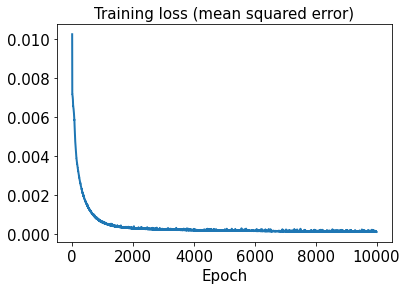

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

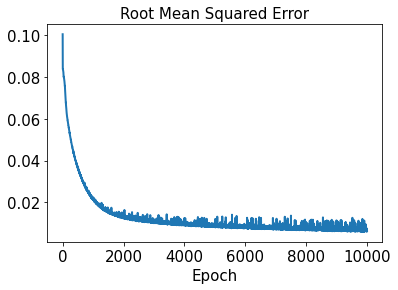

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

37/37 [==============================] - 0s 1ms/step - loss: 5.8188e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.003968697


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0056572887


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0033343069, 0.0039764596, 0.0032613622, 0.0028532816, 0.0036654726, 0.0035721166, 0.0023416143, 0.0057056537, 0.0045136516, 0.0025486636, 0.005549064, 0.0029241773, 0.003501184, 0.0046144333, 0.0049779047, 0.0035855293, 0.0027601265, 0.0028407006, 0.0051992736, 0.005311319, 0.002955551, 0.005382339, 0.0037298466, 0.0039662174, 0.0049492773, 0.01426216, 0.0038301551, 0.0023026175, 0.00797578, 0.0035388982, 0.0032137707, 0.0024914034, 0.003196215, 0.0021098624, 0.0038738817, 0.0029746331, 0.0051313024, 0.004353185, 0.0032818217, 0.0031244855, 0.0047622104, 0.0016102267, 0.002449802, 0.004948283, 0.003548309, 0.002265019, 0.0051940917, 0.0055594537, 0.003248642, 0.0025132867, 0.003873214, 0.0030541408, 0.0030432073, 0.0032723264, 0.004110258, 0.0029402904, 0.0035241942, 0.0027330143, 0.007687398, 0.003503073, 0.002841209, 0.004455368, 0.0030048324, 0.004215931, 0.010137639, 0.0047875093, 0.00505345, 0.005039783, 0.004432112, 0.00405275, 0.0035660283, 0.002121424, 0.0038596608, 0.004593

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0045665996, 0.0052051297, 0.005487424, 0.007178998, 0.0036237657, 0.004726154, 0.0037335511, 0.0050518108, 0.003495864, 0.005587501, 0.0054722056, 0.009655675, 0.004303444, 0.0045422143, 0.010231039, 0.0076510822, 0.0033768425, 0.008877652, 0.0045072073, 0.0070548323, 0.0043948838, 0.0050857803, 0.00625532, 0.00705295, 0.0028605289, 0.010165091, 0.0033188176, 0.0031920667, 0.009228851, 0.004266408, 0.0056642843, 0.008497469, 0.0048844023, 0.0040703244, 0.00604933, 0.014909452, 0.0033308933, 0.004945459, 0.0050994693, 0.0028437383, 0.0035236971, 0.0061685047, 0.0069682226, 0.00384915, 0.004194187, 0.0077907923, 0.009337524, 0.0064368183, 0.0022553566, 0.0040755114, 0.0043284926, 0.0042339675, 0.004343659, 0.006135276, 0.0049122097, 0.009483163, 0.0035948376, 0.005077432, 0.0075883185, 0.0033348063, 0.0032943918, 0.007802069, 0.0050681434, 0.009017391, 0.01009114, 0.0022550835, 0.0027520412, 0.0042518857, 0.0031170326, 0.0039977906, 0.0038620583, 0.0033181522, 0.008226867, 0.003395567

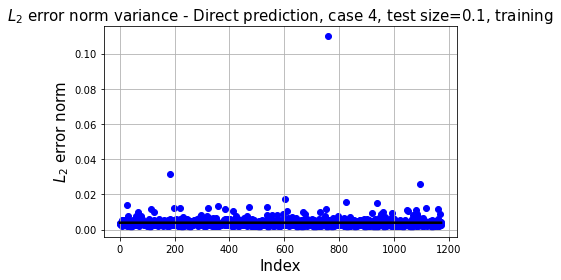

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 4, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

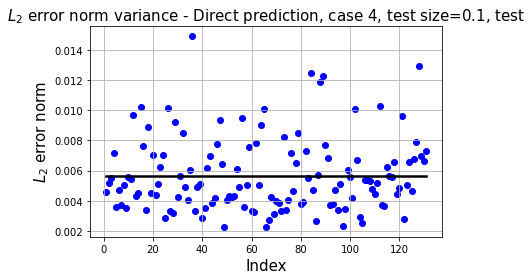

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 4, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

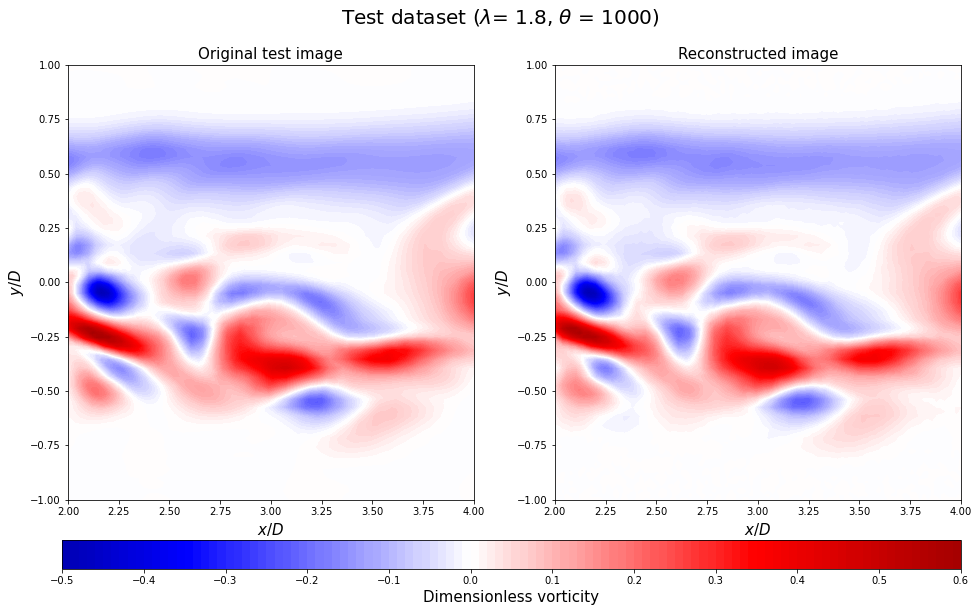

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

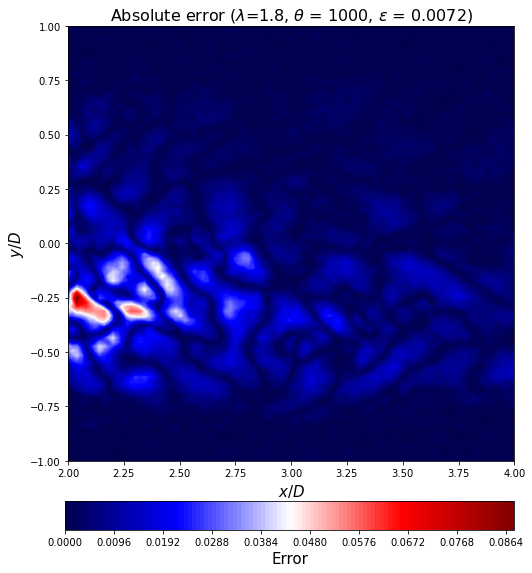

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()